<a href="https://colab.research.google.com/github/Tizartijo/LearnPhy_ML/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRADIENT DESCENT ALGORITHMS**

---

# Implementation of linear regression with two coefficients

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def batch_grad_desc(X,y,coef,alfa=0.5,nV=100):  
  N = y.shape[0]

  for i in range(nV):
    yhat  = X@coef 
    error = yhat-y

    # Partial derivative and coefficient update
    coef[0] = coef[0] - alfa * 1/N * np.sum(error)
    coef[1] = coef[1] - alfa * 1/N * np.sum(error*X[:,1])
  return coef

# Linear regression calculation by gradient descent algorithm
np.random.seed(303)

# Settings
N    = 500
nV   = 500
alfa = 0.5

coef = np.array([0.0,0.0]) # Initial guess
x = np.random.rand(N)
y = -x+np.random.randn(N)*0.5

# add a column of ones before x vector
X = np.vstack((np.ones_like(x),x)).T

# Gradient descent algorithm
coef = batch_grad_desc(X,y,coef,alfa,nV)

# Coefficient projection
yhat  = X@coef 

# Compare result with linear regression fit by matrix multiplication
beta = np.linalg.inv(X.T@X) @ (X.T@y)

print(coef)
print(beta)

plt.plot(x,y,'.')
plt.plot(x,yhat)
plt.show()

# Implementation of linear regression with N coefficients

[-8.99123775 -4.99557375 -9.91975229 -6.9693898   1.95543659 -9.92359539]
[-8.99898119 -4.99744771 -9.93018515 -6.98671068  1.96456569 -9.99358099]
0.9724437192522524 0.9778868106989187


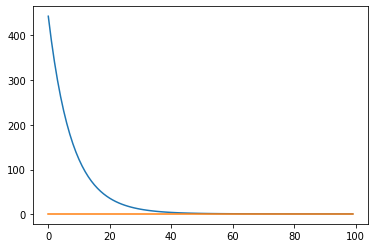

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def batch_grad_desc(X,y,coef,alfa=0.05,nV=100):  
  N  = X.shape[0]
  nc = coef.shape[0]
  E = np.zeros(nV)

  for i in range(nV):
    yhat  = X@coef 
    error = yhat-y
    E[i] = np.mean(error**2)

    # Partial derivative and coefficient update
    for c in range(nc):
      coef[c] = coef[c] - alfa * 1/N * np.sum(error*X[:,c])

  return coef,E

# Linear regression calculation by gradient descent algorithm
np.random.seed(28)

# Settings
N    = 1000
nvar = 5
nV   = 100
alfa = 0.05

# Draw x and calculate y
theta = np.random.randint(-10,10,nvar+1)

X = np.ones((N,nvar+1))
for nc in range(nvar):
  X[:,nc] = np.random.uniform(-2, 2, N)
noise = np.random.randn(N)
y = X @ theta + noise 

# Gradient descent algorithm
coef = np.zeros(nvar+1) # Initial guess
coef,E = batch_grad_desc(X,y,coef,alfa,nV)

# Compare result with normal linear regression fit 
beta = np.linalg.inv(X.T@X) @ X.T@y

# Coefficient projection
yhat1  = X@beta 
yhat2  = X@coef 

error1 = np.mean((y-yhat1)**2)
error2 = np.mean((y-yhat2)**2)

print(coef)
print(beta)
print(error1,error2)

plt.plot(E)
plt.plot(np.ones(nV)*error1)
# plt.plot(y,yhat1,'.')
# plt.plot(y,yhat2,'.')
plt.show()


# Implementation of Polinomial regression ¿?